In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scanpy as sc
from scipy.sparse import csr_matrix
import anndata

sc.settings.verbosity = 3
sc.settings.set_figure_params(dpi=60, frameon=False, figsize=(6,3), facecolor='white')

In [2]:
adata = sc.read('../2/0 mou.txt')

--> This might be very slow. Consider passing `cache=True`, which enables much faster reading from a cache file.


In [3]:
adata

AnnData object with n_obs × n_vars = 21500 × 6598

In [4]:
adata = adata.transpose()

In [5]:
adata.obs['Specimen'] = adata.obs.index.to_series().str.split('_',expand=True)[0]
adata.obs['Population'] = adata.obs.index.to_series().str.split('_',expand=True)[1]
adata.obs['source'] = adata.obs['Specimen'].astype(str) + '_' + adata.obs['Population'].astype(str)

In [7]:
adata.obs

,Specimen,Population,source
M1_TBM_PCR2-4_altered_out_gene_exon_AGGCCATTGGGC,M1,TBM,M1_TBM
M1_TBM_PCR2-4_altered_out_gene_exon_GCTGGATCGCTT,M1,TBM,M1_TBM
M1_TBM_PCR2-4_altered_out_gene_exon_CGACTTATCTTC,M1,TBM,M1_TBM
M1_TBM_PCR2-4_altered_out_gene_exon_CTAATCTGTTAG,M1,TBM,M1_TBM
M1_TBM_PCR2-4_altered_out_gene_exon_AGTTATGGTTCG,M1,TBM,M1_TBM
...,...,...,...
M3_DBM_PCR2-9_altered_out_gene_exon_TCCCAATAGGTG,M3,DBM,M3_DBM
M3_DBM_PCR2-9_altered_out_gene_exon_GTAGGGACTTCA,M3,DBM,M3_DBM
M3_DBM_PCR2-9_altered_out_gene_exon_TAGCGTATCAAG,M3,DBM,M3_DBM
M3_DBM_PCR2-9_altered_out_gene_exon_AGGGGTCTAATT,M3,DBM,M3_DBM


(array([ 13., 132., 377., 537., 483., 425., 403., 397., 379., 298., 292.,
        238., 221., 206., 196., 146., 141., 156., 118., 107., 110.,  91.,
        107.,  85.,  81.,  67.,  53.,  48.,  60.,  48.,  45.,  47.,  40.,
         47.,  35.,  40.,  28.,  25.,  20.,  28.,  23.,  17.,  13.,  17.,
         14.,  10.,  14.,  17.,   6.,   6.,   9.,   4.,  10.,   7.,   6.,
          7.,   4.,   6.,   9.,   3.,   3.,   4.,   2.,   1.,   2.,   3.,
          0.,   0.,   2.,   1.,   0.,   1.,   1.,   0.,   0.,   1.,   2.,
          0.,   0.,   1.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([1.00000e+00, 7.73100e+01, 1.53620e+02, 2.29930e+02, 3.06240e+02,
        3.82550e+02, 4.58860e+02, 5.35170e+02, 6.11480e+02, 6.87790e+02,
        7.64100e+02, 8.40410e+02, 9.16720e+02, 9.93030e+02, 1.06934e+03,
        1.14565e+03, 1.22196e+03, 1.29827e+03, 1.37458e+03, 1.45089e+03,
        1.52720e+03, 1.603

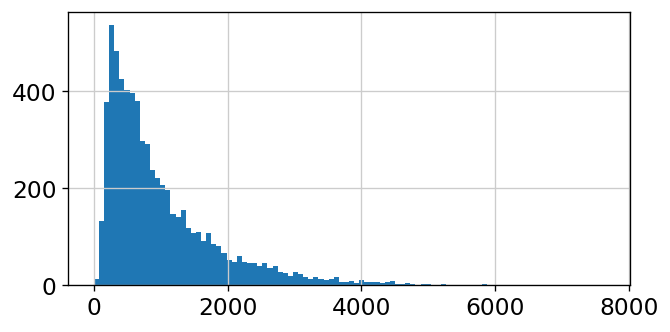

In [6]:
# number of genes expressed in each cell
plt.hist(np.sort(np.sum(adata.X > 0, axis = 1)), bins=100)

(array([1.0536e+04, 1.3770e+03, 9.0700e+02, 6.9200e+02, 6.2600e+02,
        5.2900e+02, 4.6200e+02, 4.1200e+02, 3.4600e+02, 3.0800e+02,
        2.5600e+02, 2.8200e+02, 2.3600e+02, 2.4600e+02, 2.3200e+02,
        1.8600e+02, 1.7700e+02, 1.6000e+02, 1.8300e+02, 1.3800e+02,
        1.4400e+02, 1.3700e+02, 1.3900e+02, 1.2200e+02, 1.2100e+02,
        9.6000e+01, 1.0600e+02, 1.0800e+02, 1.1000e+02, 9.4000e+01,
        9.1000e+01, 7.3000e+01, 6.8000e+01, 6.1000e+01, 8.0000e+01,
        5.6000e+01, 6.6000e+01, 5.7000e+01, 5.9000e+01, 5.0000e+01,
        4.2000e+01, 5.3000e+01, 4.2000e+01, 5.4000e+01, 3.7000e+01,
        4.8000e+01, 2.9000e+01, 3.5000e+01, 3.4000e+01, 2.7000e+01,
        3.7000e+01, 3.3000e+01, 3.5000e+01, 3.7000e+01, 3.0000e+01,
        3.0000e+01, 3.5000e+01, 2.7000e+01, 2.1000e+01, 3.1000e+01,
        1.7000e+01, 3.5000e+01, 2.3000e+01, 2.9000e+01, 1.8000e+01,
        1.6000e+01, 1.9000e+01, 1.8000e+01, 1.7000e+01, 2.2000e+01,
        1.5000e+01, 1.5000e+01, 1.3000e+01, 8.00

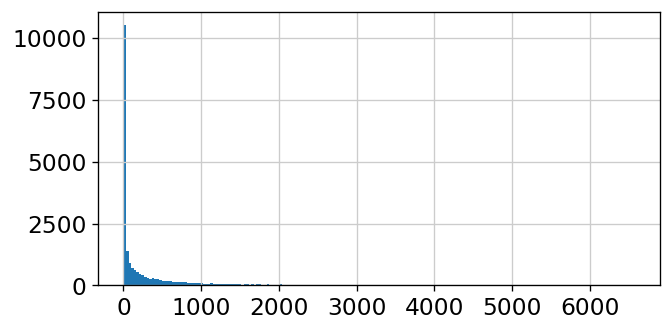

In [7]:
# number of cell each gene is expressed in
plt.hist(np.sort(np.sum(adata.X > 0, axis = 0)),bins=200)

normalizing counts per cell
    finished (0:00:00)


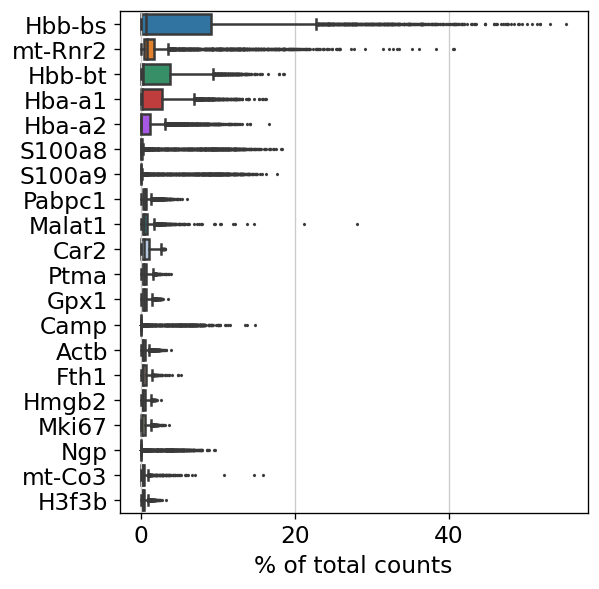

In [8]:
sc.pl.highest_expr_genes(adata, n_top=20, )

In [9]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

filtered out 329 cells that have less than 200 genes expressed
filtered out 4621 genes that are detected in less than 3 cells


In [10]:
adata

AnnData object with n_obs × n_vars = 6269 × 16879
    obs: 'Specimen', 'Population', 'source', 'n_genes'
    var: 'n_cells'

In [11]:
adata.obs

,Specimen,Population,source,n_genes
M1_TBM_PCR2-4_altered_out_gene_exon_AGGCCATTGGGC,M1,TBM,M1_TBM,4878
M1_TBM_PCR2-4_altered_out_gene_exon_GCTGGATCGCTT,M1,TBM,M1_TBM,4094
M1_TBM_PCR2-4_altered_out_gene_exon_CGACTTATCTTC,M1,TBM,M1_TBM,3625
M1_TBM_PCR2-4_altered_out_gene_exon_CTAATCTGTTAG,M1,TBM,M1_TBM,3304
M1_TBM_PCR2-4_altered_out_gene_exon_AGTTATGGTTCG,M1,TBM,M1_TBM,3343
...,...,...,...,...
M3_DBM_PCR2-9_altered_out_gene_exon_TTTGCGTAGTTG,M3,DBM,M3_DBM,274
M3_DBM_PCR2-9_altered_out_gene_exon_TCATCATCCGTC,M3,DBM,M3_DBM,223
M3_DBM_PCR2-9_altered_out_gene_exon_TCCCAATAGGTG,M3,DBM,M3_DBM,239
M3_DBM_PCR2-9_altered_out_gene_exon_AGGGGTCTAATT,M3,DBM,M3_DBM,257


In [12]:
adata.var

,n_cells
0610005C13Rik,3
0610007N19Rik,17
0610007P14Rik,602
0610009B22Rik,387
0610009D07Rik,1839
...,...
n-R5s204,3
n-R5s211,9
n-R5s28,4
n-R5s41,4


normalizing counts per cell
    finished (0:00:00)


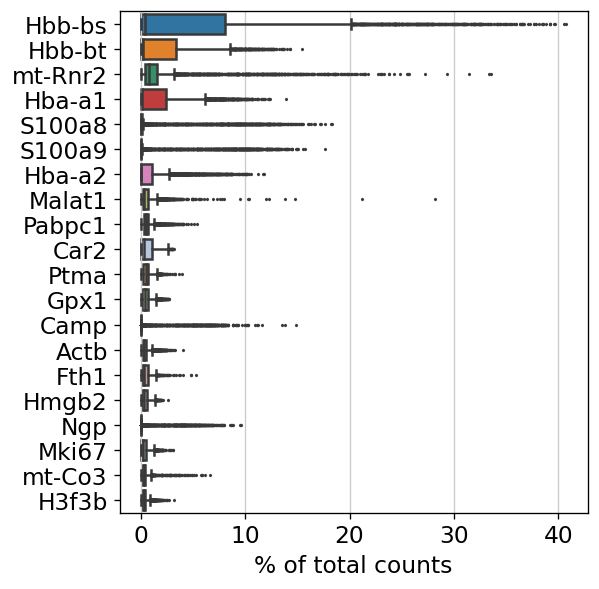

In [13]:
sc.pl.highest_expr_genes(adata, n_top=20, )

In [14]:
# sparsity
1 - np.count_nonzero(adata.X)/np.size(adata.X)

0.9379328632532432

In [15]:
adata.X = csr_matrix(adata.X)

In [16]:
adata.var['mt'] = adata.var_names.str.startswith('mt-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

In [17]:
adata.obs # total_counts == nUMI

,Specimen,Population,source,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt
M1_TBM_PCR2-4_altered_out_gene_exon_AGGCCATTGGGC,M1,TBM,M1_TBM,4878,4874,22743.0,516.0,2.268830
M1_TBM_PCR2-4_altered_out_gene_exon_GCTGGATCGCTT,M1,TBM,M1_TBM,4094,4093,16328.0,328.0,2.008819
M1_TBM_PCR2-4_altered_out_gene_exon_CGACTTATCTTC,M1,TBM,M1_TBM,3625,3620,12809.0,354.0,2.763682
M1_TBM_PCR2-4_altered_out_gene_exon_CTAATCTGTTAG,M1,TBM,M1_TBM,3304,3304,9527.0,323.0,3.390364
M1_TBM_PCR2-4_altered_out_gene_exon_AGTTATGGTTCG,M1,TBM,M1_TBM,3343,3340,9527.0,313.0,3.285399
...,...,...,...,...,...,...,...,...
M3_DBM_PCR2-9_altered_out_gene_exon_TTTGCGTAGTTG,M3,DBM,M3_DBM,274,274,370.0,45.0,12.162163
M3_DBM_PCR2-9_altered_out_gene_exon_TCATCATCCGTC,M3,DBM,M3_DBM,223,223,319.0,36.0,11.285266
M3_DBM_PCR2-9_altered_out_gene_exon_TCCCAATAGGTG,M3,DBM,M3_DBM,239,238,351.0,16.0,4.558404
M3_DBM_PCR2-9_altered_out_gene_exon_AGGGGTCTAATT,M3,DBM,M3_DBM,257,256,336.0,33.0,9.821428


/home/lh3n19/.conda/envs/my/lib/python3.8/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'Specimen' as categorical
/home/lh3n19/.conda/envs/my/lib/python3.8/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'Population' as categorical
/home/lh3n19/.conda/envs/my/lib/python3.8/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a futu

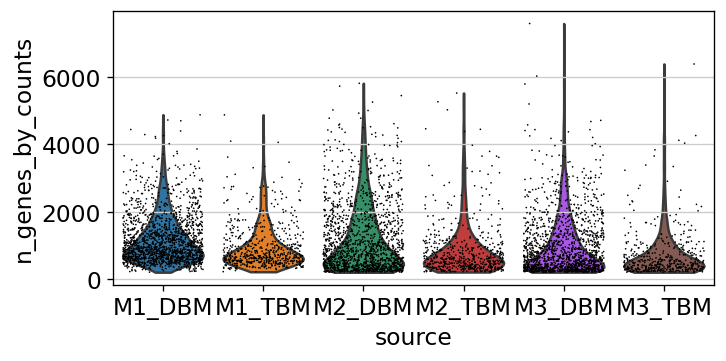

In [18]:
sc.pl.violin(adata, ['n_genes_by_counts'], groupby='source',jitter=0.4,multi_panel=True)

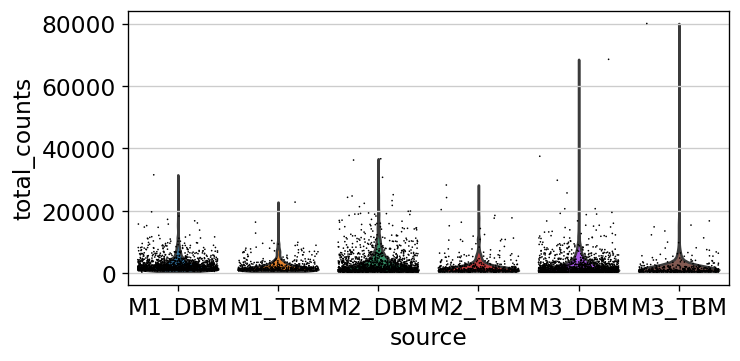

In [19]:
sc.pl.violin(adata, ['total_counts'], groupby='source',jitter=0.4,multi_panel=True)

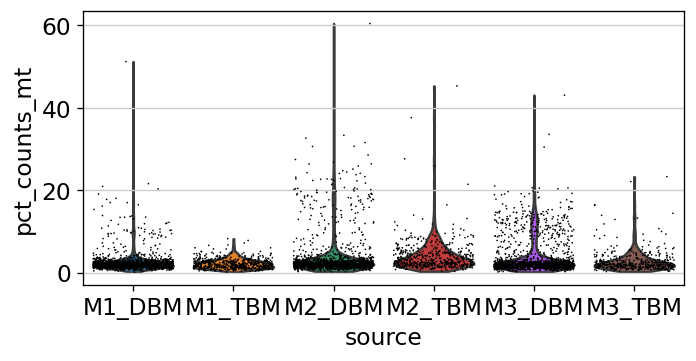

In [20]:
sc.pl.violin(adata, ['pct_counts_mt'], groupby='source',jitter=0.4, multi_panel=True)

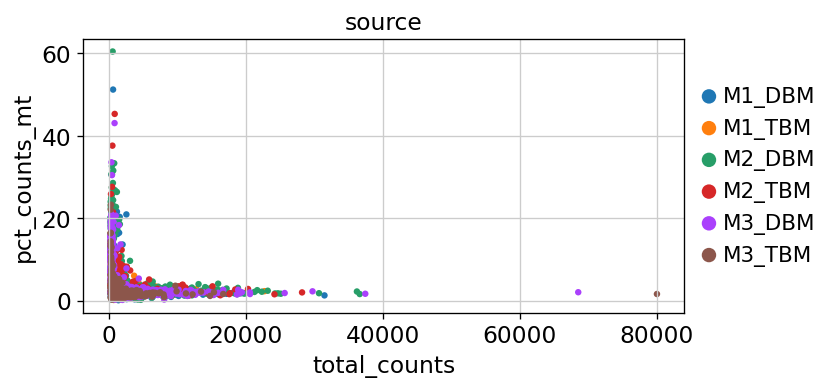

In [21]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt', color='source',size=60)

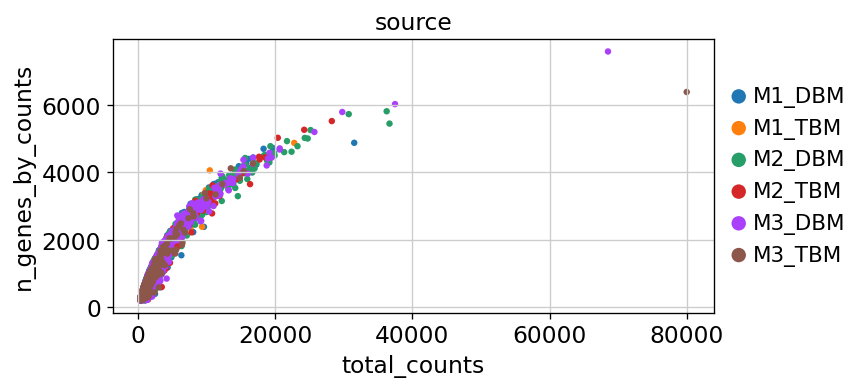

In [22]:
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts', color='source',size=60)

In [23]:
adata = adata[adata.obs.pct_counts_mt < 5, :]
adata = adata[adata.obs.total_counts < 4e4, :]
adata = adata[adata.obs.total_counts > 200, :]

In [24]:
adata

View of AnnData object with n_obs × n_vars = 5521 × 16879
    obs: 'Specimen', 'Population', 'source', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'source_colors'

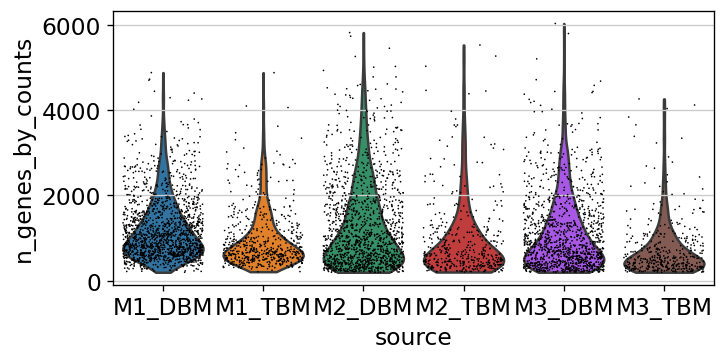

In [25]:
sc.pl.violin(adata, ['n_genes_by_counts'], groupby='source',jitter=0.4,multi_panel=True)

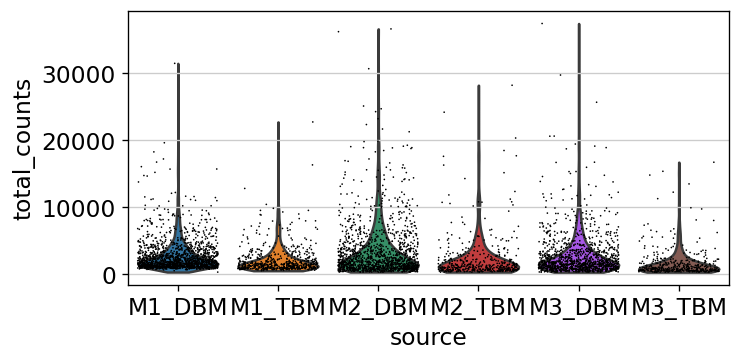

In [26]:
sc.pl.violin(adata, ['total_counts'], groupby='source',jitter=0.4,multi_panel=True)

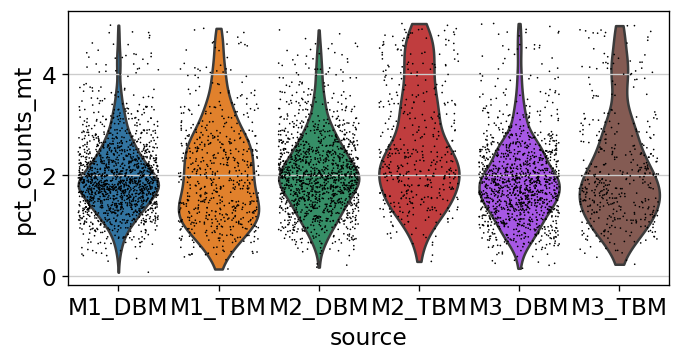

In [27]:
sc.pl.violin(adata, ['pct_counts_mt'], groupby='source',jitter=0.4, multi_panel=True)

In [28]:
adata = adata[:,~adata.var['mt']]

In [29]:
adata

View of AnnData object with n_obs × n_vars = 5521 × 16844
    obs: 'Specimen', 'Population', 'source', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'source_colors'

In [30]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

filtered out 9 cells that have less than 200 genes expressed


Trying to set attribute `.obs` of view, copying.


filtered out 252 genes that are detected in less than 3 cells


In [31]:
adata

AnnData object with n_obs × n_vars = 5512 × 16592
    obs: 'Specimen', 'Population', 'source', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'source_colors'

In [32]:
adata.write_h5ad('2 filtered_mou_0902.h5ad')

In [3]:
adata = anndata.read_h5ad('2 filtered_mou_0829.h5ad')

In [33]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

normalizing counts per cell
    finished (0:00:00)


In [34]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=4, min_disp=0.5)

extracting highly variable genes
    finished (0:00:06)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


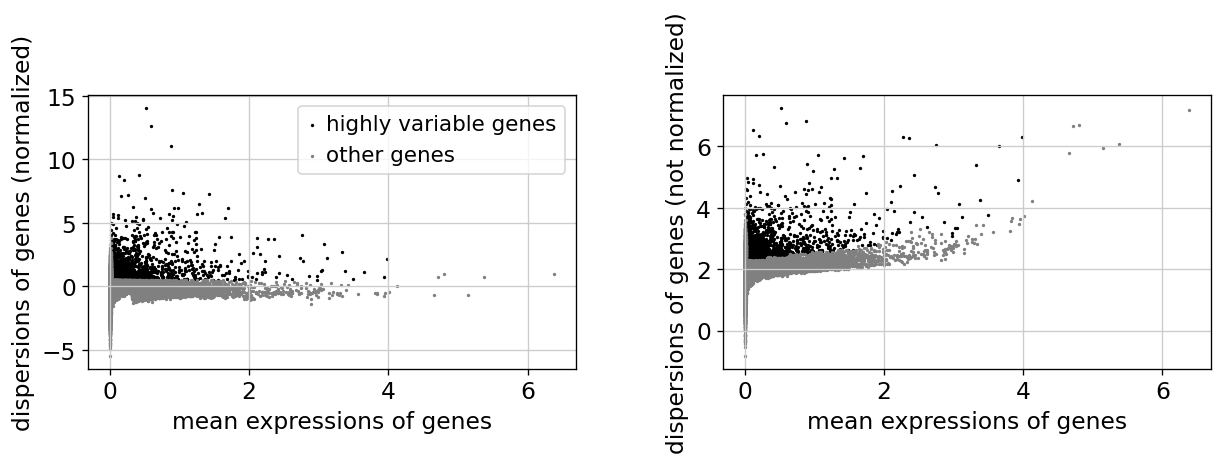

In [35]:
sc.pl.highly_variable_genes(adata)

In [36]:
# Not Centered, for NMF
sc.pp.scale(adata, zero_center = False)

In [37]:
np.sum(adata.X<0)

0

In [38]:
adata.write_h5ad('2 filtered_normalised_scaled_mou_0902.h5ad')